<a href="https://colab.research.google.com/github/gena515/PowerShell/blob/master/ToyotaCorolla(11_10_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
from google.colab import files
uploaded = files.upload() # Removed extra space at the start of the line

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [5]:
import csv

# Open the CSV file
with open('ToyotaCorolla.csv', mode='r') as file:
    csv_reader = csv.reader(file)

    header = next(csv_reader)

    formatted_data = []

    for row in csv_reader:
        if len(row) >= 16:
            formatted_data.append(row[0:39])

column_names = header[0:39]

df_sm = pd.DataFrame(formatted_data, columns=column_names)

df_sm.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,193,TOYOTA Corolla 1.8D Stationwagen,4350,44,1,2001,158320,Diesel,69,0,...,1,1,0,0,0,0,0,0,0,0
1,1053,TOYOTA Corolla 2.0D LINEA TERRA+airco 2/3-Doors,4400,74,7,1998,203254,Diesel,72,1,...,0,1,0,0,0,0,0,0,0,0
2,396,TOYOTA Corolla 1.8D Stationwagen,4450,56,1,2000,129155,Diesel,69,0,...,0,1,0,0,0,0,0,0,0,0
3,194,TOYOTA Corolla 1.8D 4/5-Doors,4750,44,1,2001,131273,Diesel,69,1,...,1,1,0,0,0,0,0,0,0,0
4,405,TOYOTA Corolla 2.0D 4/5-Doors,5150,56,1,2000,113997,Diesel,72,1,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   object
 1   Model              1436 non-null   object
 2   Price              1436 non-null   object
 3   Age_08_04          1436 non-null   object
 4   Mfg_Month          1436 non-null   object
 5   Mfg_Year           1436 non-null   object
 6   KM                 1436 non-null   object
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   object
 9   Met_Color          1436 non-null   object
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   object
 12  CC                 1436 non-null   object
 13  Doors              1436 non-null   object
 14  Cylinders          1436 non-null   object
 15  Gears              1436 non-null   object
 16  Quarterly_Tax      1436 non-null   object


In [10]:
#Use Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar
selected_data = df_sm.loc[0:1436,['Age_08_04','KM','Fuel_Type','HP','Automatic','Doors','Quarterly_Tax','Mfr_Guarantee', 'Guarantee_Period',
'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']]
print(selected_data)

     Age_08_04      KM Fuel_Type   HP Automatic Doors Quarterly_Tax  \
0           44  158320    Diesel   69         0     5            64   
1           74  203254    Diesel   72         0     3            64   
2           56  129155    Diesel   69         0     5            64   
3           44  131273    Diesel   69         0     5            64   
4           56  113997    Diesel   72         0     5            64   
...        ...     ...       ...  ...       ...   ...           ...   
1431         8   13253    Diesel  116         0     5           234   
1432         8    6000    Diesel   90         0     5           234   
1433         4    4000    Diesel  116         0     5           283   
1434         4    1500    Diesel  116         0     5           283   
1435         4       1    Diesel  116         0     5           283   

     Mfr_Guarantee Guarantee_Period Airco Automatic_airco CD_Player  \
0                0                3     0               0         0   
1    

     Id                                            Model  Price  Age_08_04  \
0   193                 TOYOTA Corolla 1.8D Stationwagen   4350         44   
1  1053  TOYOTA Corolla 2.0D LINEA TERRA+airco 2/3-Doors   4400         74   
2   396                 TOYOTA Corolla 1.8D Stationwagen   4450         56   
3   194                    TOYOTA Corolla 1.8D 4/5-Doors   4750         44   
4   405                    TOYOTA Corolla 2.0D 4/5-Doors   5150         56   

   Mfg_Month  Mfg_Year      KM Fuel_Type  HP  Met_Color  ... Powered_Windows  \
0          1      2001  158320    Diesel  69          0  ...               1   
1          7      1998  203254    Diesel  72          1  ...               0   
2          1      2000  129155    Diesel  69          0  ...               0   
3          1      2001  131273    Diesel  69          1  ...               1   
4          1      2000  113997    Diesel  72          1  ...               0   

   Power_Steering  Radio  Mistlamps  Sport_Model  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


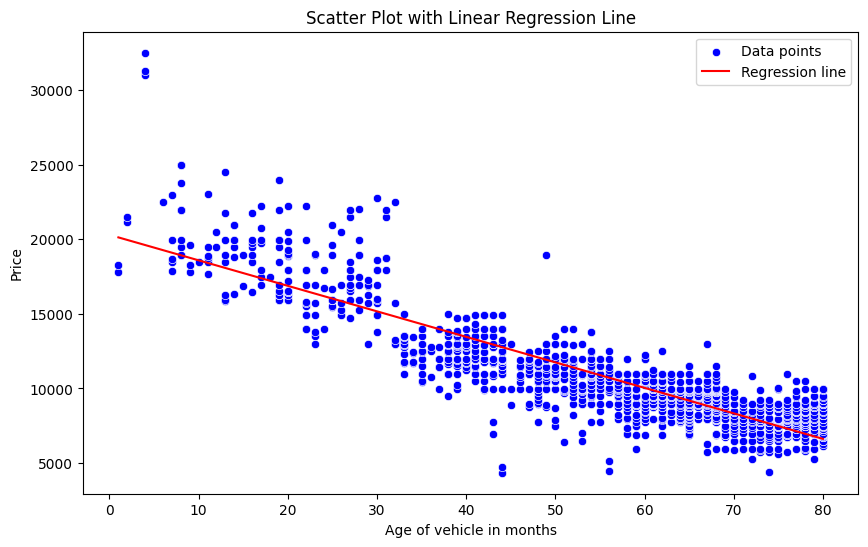

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('ToyotaCorolla.csv')

print(df.head())

X = df[['Age_08_04']]  # Independent variable
y = df['Price']  # Dependent variable (cost)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_08_04', y='Price', data=df, color='blue', label='Data points')

model = LinearRegression()
model.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.plot(X_range, y_pred, color='red', label='Regression line')

plt.xlabel('Age of vehicle in months')
plt.ylabel('Price')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()

QUESTION 1: What appears to be the three or four most important car specifications for predicting the car’s price?

There are various specifications of cars from Toyota and it would be necessary to identifiy a coorelation of those features to price.

In [12]:
df = pd.read_csv('ToyotaCorolla.csv')

numeric_data = df.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

price_corr = corr_matrix['Price'].abs().sort_values(ascending=False)

print(price_corr.head(10))


Price              1.000000
Mfg_Year           0.885159
Age_08_04          0.876590
Id                 0.738250
Boardcomputer      0.601292
Automatic_airco    0.588262
Weight             0.581198
KM                 0.569960
CD_Player          0.481374
Airco              0.429259
Name: Price, dtype: float64


The top factors that appear to have the strongest correlations with car price are:

1. Manufacturing Year (Mfg_Year): 0.89 correlation
2. Car Agein months (Age_08_04): 0.88 correlation
3. Presence of a Board Computer: 0.60 correlation
4. Automatic Air Conditioning: 0.59 correlation

QUESTION 2: Using metrics you consider useful, assess the performance of the model in predicting prices.

TRAINING AND TESTING SETS ON AGE OF TOYOTA CAR IN MONTHS:

In [22]:
from sklearn.model_selection import train_test_split

# Preprocess the data
df_data = df.select_dtypes(include=[float, int]).dropna()

# Define features
X = df_data.drop(columns=['Price', 'Age_08_04'])
y = df_data['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 1148
Testing set size: 288


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df_data = df.select_dtypes(include=[float, int]).dropna()

X = df_data.drop(columns=['Price', 'Age_08_04'])
y = df_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Test set predictions
y_pred = model.predict(X_test)

# Calculate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 848.6748299241849
Mean Squared Error (MSE): 1316429.289189826
Root Mean Squared Error (RMSE): 1147.357524571058
R-squared (R²): 0.9073151268216931


TESTING WITH HISTOGRAM

Training set size: 1148
Testing set size: 288


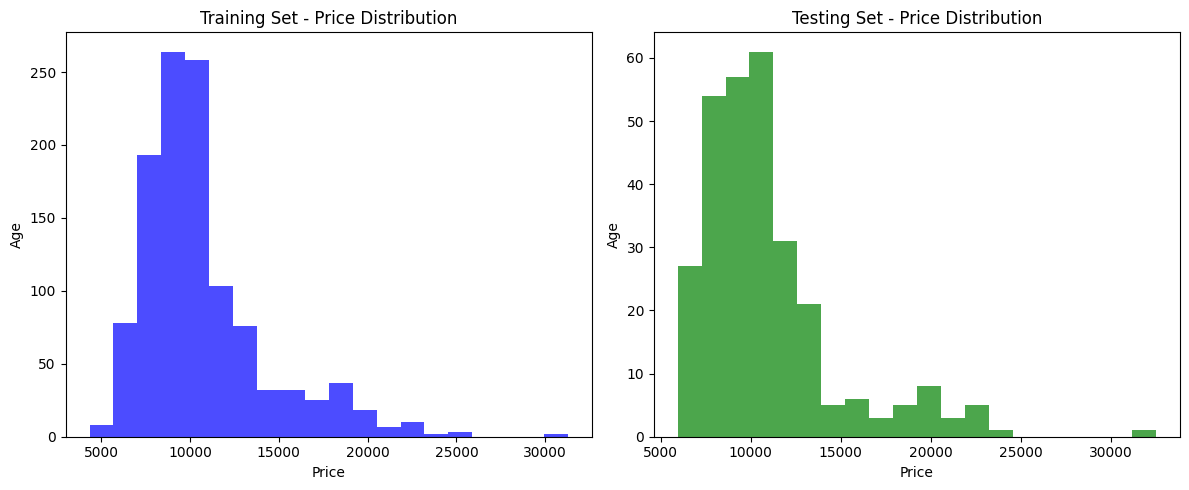

Cross-Validation R² Scores: [0.61753507 0.89179414 0.89350126 0.91122676 0.91370067]
Average Cross-Validation R² Score: 0.8455515803736484


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Load the dataset and prepare features and target
df = pd.read_csv('ToyotaCorolla.csv')
df_data = df.select_dtypes(include=[float, int]).dropna()
X = df_data.drop(columns=['Price', 'Age_08_04'])
y = df_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validation Step 1: Check the sizes of the training and test sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Validation Step 2: Verify target variable distribution
plt.figure(figsize=(12, 5))

# Histogram of training set prices
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, color='blue', alpha=0.7)
plt.title("Training Set - Price Distribution")
plt.xlabel("Price")
plt.ylabel("Age")

# Histogram of test set prices
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, color='green', alpha=0.7)
plt.title("Testing Set - Price Distribution")
plt.xlabel("Price")
plt.ylabel("Age")

plt.tight_layout()
plt.show()

# Validation Step 3: Cross-validation on training set
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # R-squared scoring

print("Cross-Validation R² Scores:", cv_scores)
print("Average Cross-Validation R² Score:", cv_scores.mean())


TESTING WITH A SCATTER PLOT AND LINEAR REGRESSION LINE.

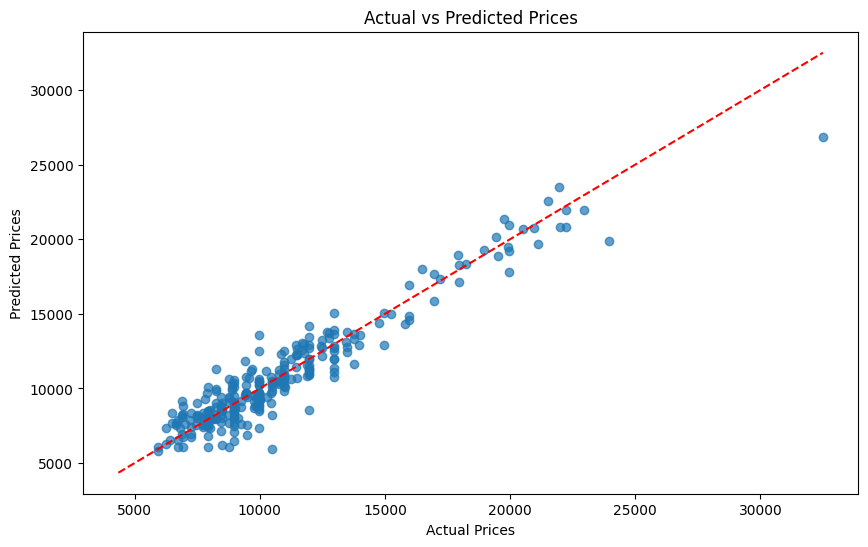

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('ToyotaCorolla.csv')
df_data = df.select_dtypes(include=[float, int]).dropna()
X = df_data.drop(columns=['Price', 'Age_08_04'])
y = df_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
